### [regex101](https://regex101.com/)
동작 설명이 잘되어 있고, 코드작성예제도 같이 제공함

###  [Pythex: a Python regular expression editor](https://pythex.org/) 
#### Pythex is a real-time regular expression editor for Python, a quick way to test your regular expressions.

### [PyRegex: Your Python Regular Expression's Best Buddy](http://www.pyregex.com/)

In [1]:
import re

#### metacharacter (Need to be escaped) :
. ^ $ * + ? { } [ ] \ | ( ) <br>

[ ] 안에서는 특수 문자 역할을 하지 못함

[^5] -> will match any character except '5'. [5^] will match either a '5' or a '^'.

In [2]:
p = re.compile('a[bcd]*b')
p.match('abcbbdba')

<re.Match object; span=(0, 7), match='abcbbdb'>

In [3]:
p.match('abcbbdba').group(), p.match('abcbbdba')[0]

('abcbbdb', 'abcbbdb')

In [4]:
p = re.compile("^'u[a-z]*")
p.match("'uabc de'")

<re.Match object; span=(0, 5), match="'uabc">

In [5]:
pattern = re.compile("^[a-zA-Z0-9_]*")
pattern.match('abcde fgh')

<re.Match object; span=(0, 5), match='abcde'>

In [6]:
pattern.match('abcde fgh').group()

'abcde'

In [7]:
# \w is equivalent to [A-Za-z0-9_] 
pattern = re.compile("^\w*")
pattern.match('abcde fgh')

<re.Match object; span=(0, 5), match='abcde'>

\d is equivalent to the class [0-9].

\D is equivalent to the class [^0-9].

\s is equivalent to the class [ \t\n\r\f\v].

\S is equivalent to the class [^ \t\n\r\f\v].

\w is equivalent to the class [a-zA-Z0-9_].

\W is equivalent to the class [^a-zA-Z0-9_].

[\s,.] is a character class that will match any whitespace character, or ',' or '.'.

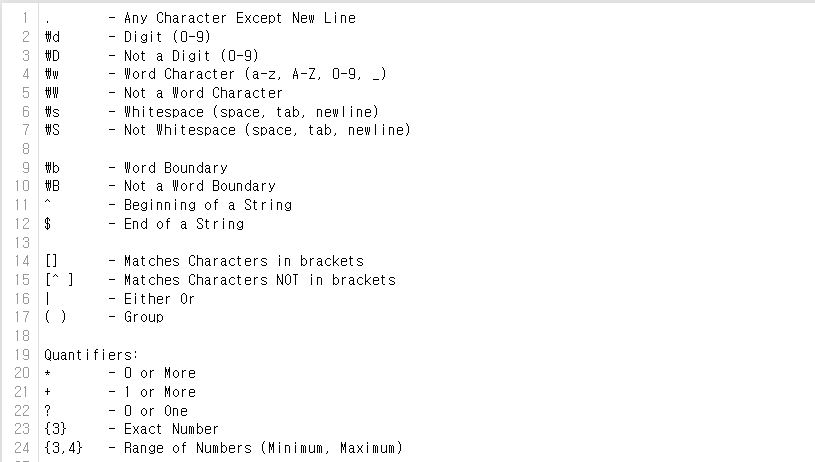

In [8]:
p = re.compile('ab*')
p = re.compile('ab*', re.IGNORECASE)

### Python’s raw string notation for regular expressions
backslashes are not handled in any special way in a string literal prefixed with 'r', so r"\n" is a two-character string containing '\' and 'n', while "\n" is a one-character string containing a newline. Regular expressions will often be written in Python code using this raw string notation.
#### <span style='color:red'> r'\n' == '\\' + 'n' while '\n' == one character string </span>

### Performing Matches

<table border="1">
<th>Method/Attribute</th>
<th>Purpose</th>
<tr align ="center"><!-- 1번째 줄 시작 -->
    <td>match()</td>
    <td>Determine if the RE matches at the beginning of the string.</td>
</tr><!-- 1번째 줄 끝 -->
<tr align ="center"><!-- 2번째 줄 시작 -->
    <td>search()</td>
    <td>Scan through a string, looking for any location where this RE matches.</td>
<tr align ="center"><!-- 3번째 줄 시작 -->
    <td>findall()</td>
    <td>Find all substrings where the RE matches, and returns them as a list.</td>
</tr><!-- 3번째 줄 끝 -->
<tr align ="center"><!-- 4번째 줄 시작 -->
    <td>finditer()</td>
    <td>Find all substrings where the RE matches, and returns them as an iterator.</td>
</tr><!-- 4번째 줄 끝 -->

</table>

match() and search() return <span style='color:red'>None</span> if no match can be found. 

In [9]:
p = re.compile('[a-z]+')
print(p.match(""))

None


In [10]:
m = p.match('tempo')
m

<re.Match object; span=(0, 5), match='tempo'>

In [11]:
m[0]

'tempo'

<table border="1">
<th>Method/Attribute</th>
<th>Purpose</th>
<tr align ="center"><!-- 1번째 줄 시작 -->
    <td>group()</td>
    <td>Return the string matched by the RE</td>
</tr><!-- 1번째 줄 끝 -->
<tr align ="center"><!-- 2번째 줄 시작 -->
    <td>start()</td>
    <td>Return the starting position of the match</td>
<tr align ="center"><!-- 3번째 줄 시작 -->
    <td>end()</td>
    <td>Return the ending position of the match</td>
</tr><!-- 3번째 줄 끝 -->
<tr align ="center"><!-- 4번째 줄 시작 -->
    <td>span()</td>
    <td>Return a tuple containing the (start, end) positions of the match</td>
</tr><!-- 4번째 줄 끝 -->

</table>

In [12]:
m.group()

'tempo'

In [13]:
m.start(), m.end()

(0, 5)

In [14]:
m.span()

(0, 5)

In [15]:
m = p.search('::: message'); print(m)

<re.Match object; span=(4, 11), match='message'>


In [16]:
m.group(), m.span()

('message', (4, 11))

In [17]:
p = re.compile('go')
m = p.match('string goes here') # search와 차이점
# The match() function only checks if the RE matches at the beginning of the string 
# while search() will scan forward through the string for a match.
if m:
    print('Match found: ', m.group())
else:
    print('No match')

No match


In [18]:
p = re.compile('go')
m = p.search('string goes here')  # match와 차이점
if m:
    print('Match found: ', m.group())
else:
    print('No match')

Match found:  go


In [19]:
p.match( 'string goes here' )

In [20]:
p = re.compile(r'\d+')
p.findall('12 drummers drumming, 11 pipers piping, 10 lords a-leaping')

['12', '11', '10']

In [21]:
iterator = p.finditer('12 drummers drumming, 11 pipers piping, 10 lords a-leaping')
iterator  

for match in iterator:
    print(match.span())

(0, 2)
(22, 24)
(40, 42)


In [22]:
emails = '''
CoreyMSchafer@gmail.com
corey.schafer@university.edu
corey-321-schafer@my-work.net
'''

pattern = re.compile(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')

matches = pattern.finditer(emails)

for match in matches:
    print(match)

<re.Match object; span=(1, 24), match='CoreyMSchafer@gmail.com'>
<re.Match object; span=(25, 53), match='corey.schafer@university.edu'>
<re.Match object; span=(54, 83), match='corey-321-schafer@my-work.net'>


In [23]:
re.match(r'From\s+', 'From amk Thu May 14 19:12:10 1998')  

<re.Match object; span=(0, 5), match='From '>

In [24]:
p = re.compile('ab*', re.IGNORECASE)
p = re.compile('.*', re.DOTALL) # include newlines
p = re.compile('.*', re.MULTILINE) # multiline matching

| : Alternation, or the “or” operator. <br>
^ : Matches at the beginning of lines

In [25]:
print(re.search('^From', 'From Here to Eternity')) 

<re.Match object; span=(0, 4), match='From'>


In [26]:
print(re.search('^From', 'Reciting From Memory'))

None


$ : Matches at the end of a line

In [27]:
print(re.search('}$', '{block}')) 

<re.Match object; span=(6, 7), match='}'>


In [28]:
re.search('}$', '{block}')[0] # == re.search('}$', '{block}').group()

'}'

In [29]:
print(re.search('}$', '{block} '))

None


In [30]:
print(re.search('}$', '{block}\n'))

<re.Match object; span=(6, 7), match='}'>


\A : Matches only at the start of the string. When not in MULTILINE mode, <span style='color:red'> \A and ^ are effectively the same. In MULTILINE mode, they’re different</span>: \A still matches only at the beginning of the string, but ^ may match at any location inside the string that follows a newline character.

\b : Word boundary. This is a zero-width assertion that matches only at the beginning or end of a word.

In [31]:
p = re.compile(r'\bclass\b')
print(p.search('no class at all'))

<re.Match object; span=(3, 8), match='class'>


In [32]:
print(p.search('the declassified algorithm'))

None


In [33]:
print(p.search('one subclass is'))

None


### Grouping
Groups are marked by the '(', ')' metacharacters.

In [34]:
p = re.compile('(ab)*')
m = p.match('ababababab')
m.group(), m.start(), m.end(), m.span()

('ababababab', 0, 10, (0, 10))

In [35]:
m.groups()

('ab',)

In [36]:
p = re.compile('(a(b)c)d')
m = p.match('abcd')

In [37]:
m.group(0), m.group(1), m.group(2)

('abcd', 'abc', 'b')

In [38]:
len(m.groups())  # 전체를 제외한 group의 갯수
# len(m.group()) => 주의 : 첫번째 ('abcd')의 스트링 문자 갯수를 반환함.

2

In [39]:
m.groups()

('abc', 'b')

In [40]:
m = re.match("([abc])+", "abc")
m.groups()

('c',)

In [41]:
m.group(1)

'c'

In [42]:
m = re.match("(?:[abc])+", "abc")

In [43]:
m.groups()

()

The syntax for a named group is one of the Python-specific extensions: (?P<name>...). name is, obviously, the name of the group.

In [44]:
p = re.compile(r'(?P<word>\b\w+\b)')
m = p.search( '(((( Lots of punctuation )))' )
m.group('word')

'Lots'

In [45]:
m.group(1)

'Lots'

In [46]:
m = re.match(r'(?P<first>\w+) (?P<last>\w+)', 'Jane Doe')
m.groupdict()

{'first': 'Jane', 'last': 'Doe'}

In [47]:
m

<re.Match object; span=(0, 8), match='Jane Doe'>

### Modifying Strings

In [48]:
p = re.compile(r'\W+') 
# \W is equivalent to the class [^a-zA-Z0-9_].
# the delimiter is any sequence of non-alphanumeric characters.
p.split('This is a test, short and sweet, of split().')

['This', 'is', 'a', 'test', 'short', 'and', 'sweet', 'of', 'split', '']

In [49]:
# .split(string[, maxsplit=0])
p.split('This is a test, short and sweet, of split().', 3)

['This', 'is', 'a', 'test, short and sweet, of split().']

In [50]:
p.split('This is a test, short and sweet, of split().', 1)

['This', 'is a test, short and sweet, of split().']

#### delimiter도 필요할 경우 () 사용
Sometimes you’re not only interested in what the text between delimiters is, but also need to know what the delimiter was. If capturing parentheses are used in the RE, then their values are also returned as part of the list.

In [51]:
p = re.compile(r'\W+')
p2 = re.compile(r'(\W+)')

In [52]:
p.split('This... is a test.')

['This', 'is', 'a', 'test', '']

In [53]:
p2.split('This... is a test.')

['This', '... ', 'is', ' ', 'a', ' ', 'test', '.', '']

In [54]:
re.split(r'[\W]+', 'Words, words, words.')

['Words', 'words', 'words', '']

In [55]:
re.split(r'([\W]+)', 'Words, words, words.')

['Words', ', ', 'words', ', ', 'words', '.', '']

### Search and Replace

In [56]:
p = re.compile('(blue|white|red)')  # 여기에 해당되는 항목을
p.sub('colour', 'blue socks and red shoes') # colour로 바꿔라.

'colour socks and colour shoes'

In [57]:
p.sub('colour', 'blue socks and red shoes', count=1) # 1개 만 바꿈

'colour socks and red shoes'

In [58]:
urls = '''
https://www.google.com
http://coreyms.com
https://youtube.com
https://www.nasa.gov
'''

pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)')

subbed_urls = pattern.sub(r'\2\3', urls) # group 2, 3로 대체
# https://www.google.com 를 pattern으로 찾아서, \2('google') \3('.com') 으로 replace시킴
print(subbed_urls)


google.com
coreyms.com
youtube.com
nasa.gov



In [59]:
backs = re.sub(r'[\\.]', '*', 'sam.sun\\g') 
# backslash 변환 => \\ : metacharacter \와 변환대상 \  이어서 표현
backs

'sam*sun*g'

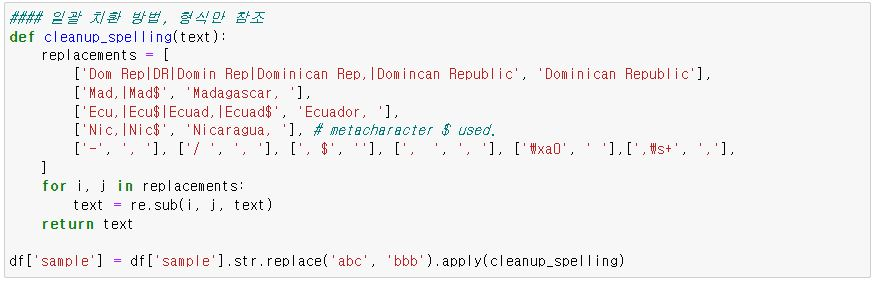

#### string.replace or re.sub 
As long as you can make do with str.replace(), you should use it. <br>
str.replace() should be used whenever it's possible to. It's more explicit, simpler, and faster.

In [60]:
p = re.compile('(blue|white|red)')
p.subn('colour', 'blue socks and red shoes')  
# subn은 몇개가 바뀌었는지 tuple로 알려줌. 2개가 바뀌었음.

('colour socks and colour shoes', 2)

In [61]:
p.subn('colour', 'no colours at all') # 비뀐 내용이 없음.

('no colours at all', 0)

In [62]:
p = re.compile('x*')
p.sub('-', 'abxd')

'-a-b--d-'

### match() versus search()
The match() function only checks if the RE matches at the beginning of the string while search() will scan forward through the string for a match. It's important to keep this distinction in mind. Remember, **match()** will only report a successful match which will **start at 0**; if the match wouldn’t start at zero, match() will not report it.

In [63]:
print(re.match('super', 'superstition').span())
print(re.match('super', 'insuperable'))

(0, 5)
None


In [64]:
print(re.search('super', 'superstition').span())
print(re.search('super', 'insuperable').span())

(0, 5)
(2, 7)


### Greedy versus Non-Greedy

In [65]:
s = '<html><head><title>Title</title>'
len(s)

32

In [66]:
print(re.match('<.*>', s).span(), re.match('<.*>', s).group())  # '.*' 가 마지막까지 matching시킴

(0, 32) <html><head><title>Title</title>


In this case, the solution is to use the non-greedy qualifiers *?, +?, ??, or {m,n}?, which match as little text as possible. 

In [67]:
print(re.match('<.*?d', s).group())  # 'd'를 처음만날때까지만 반복

<html><head


In [68]:
print(re.findall('<.*?>', s))

['<html>', '<head>', '<title>', '</title>']


### Using re.VERBOSE
For such REs, specifying the re.VERBOSE flag when compiling the regular expression can be helpful, because it allows you to format the regular expression more clearly.

In [69]:
pat = re.compile(r"""
 \s*                 # Skip leading whitespace
 (?P<header>[^:]+)   # Header name
 \s* :               # Whitespace, and a colon
 (?P<value>.*?)      # The header's value -- *? used to
                     # lose the following trailing whitespace
 \s*$                # Trailing whitespace to end-of-line
""", re.VERBOSE)

This is far more readable than:

In [70]:
pat = re.compile(r"\s*(?P<header>[^:]+)\s*:(?P<value>.*?)\s*$")

In [71]:
re.search(r'(\d\d)\1', '121212') #(\d\d)  가 한번 반복(\1 => 1번 group과 같은 내용이 한번 더 있다는 뜻)

<re.Match object; span=(0, 4), match='1212'>

In [72]:
re.search(r'(\d\d)\1\1', '121212')#(\d\d) 가 두 번 반복(\1 => 1번 group과 같은 내용이 두번 더 있다는 뜻)

<re.Match object; span=(0, 6), match='121212'>

In [73]:
subr = re.search(r'(\d\d)(\d\d)', '1234')
subr.group(1), subr.group(2)

('12', '34')

In [74]:
re.sub(r'abc', subr.group(1)+subr.group(2), 'abcdefg')

'1234defg'

In [75]:
sentence = 'Start a sentence and then bring it to an end'

pattern = re.compile(r'start', re.I) # ignorecase

matches = pattern.search(sentence)

print(matches)

<re.Match object; span=(0, 5), match='Start'>


```
숫자만 가능 : /^[0-9]+$/
이메일 형식만 가능 : /^([\w-]+(?:\.[\w-]+)*)@((?:[\w-]+\.)*\w[\w-]{0,66})\.([a-z]{2,6}(?:\.[a-z]{2})?)$/
한글만 가능 : /^[가-힣]+$/
한글,띄어쓰기만 가능 : /^[가-힣\s]+$/
영문만 가능 : /^[a-zA-Z]+$/
영문,띄어쓰기만 가능: /^[a-zA-Z\s]+$/
전화번호 형태 : /^[0-9]{2,3}-[0-9]{3,4}-[0-9]{4}$/
도메인 형태 : /^(((http(s?))\:\/\/)?)([0-9a-zA-Z\-]+\.)+[a-zA-Z]{2,6}(\:[0-9]+)?(\/\S*)?$/
도메인 형태 : /^((http(s?))\:\/\/)([0-9a-zA-Z\-]+\.)+[a-zA-Z]{2,6}(\:[0-9]+)?(\/\S*)?$/
도메인 형태 : /^[^((http(s?))\:\/\/)]([0-9a-zA-Z\-]+\.)+[a-zA-Z]{2,6}(\:[0-9]+)?(\/\S*)?$/
한글과 영문만 가능 : /^[가-힣a-zA-Z]+$/
숫자,알파벳만 가능 : /^[a-zA-Z0-9]+$/
주민번호, -까지 포함된 문자열로 검색 : /^(?:[0-9]{2}(?:0[1-9]|1[0-2])(?:0[1-9]|[1,2][0-9]|3[0,1]))-[1-4][0-9]{6}$/

출처: https://gocoding.tistory.com/93 [Developer Factory]
```

```
^The	The로 시작하는 문자열
of despair$	of despair로 끝나는 문자열
^abc$	abc로 시작하고 abc로 끝나는 문자열 (abc 라는 문자열도 해당됨)
notice	notice가 들어 있는 문자열

ab*	a 다음에 b가 0개 이상 (a, ab, abbb 등등)
ab+	a 다음에 b가 1개 이상 (ab, abbb 등등)
ab?	a 다음에 b가 있거나 없거나 (ab 또는 a)

ab{2}	a 다음에 b가 2개 있는 문자열 (abb)
ab{2,}	a 다음에 b가 2개 이상 (abb, abbbb 등등)
ab{3,5}	a 다음에 b가 3개에서 5개 사이 (abbb, abbbb, 또는 abbbbb)
*, +, ?는 각각 {0,}, {1,}, {0,1}과 같습니다.

( )는 문자열을 묶음 처리할 때 사용
a(bc)*	a 다음에 bc가 0개 이상 (묶음 처리)
a(bc){1,5}	a 다음에 bc가 1개에서 5개 사이

hi|hello	hi나 hello가 들어 있는 문자열
(b|cd)ef	bef 또는 cdef
(a|b)*c	a와 b가 섞여서 여러번 나타나고 그뒤에 c가 붙어있는 패턴

. (점)	임의의 한 문자
^.{3}$	3문자로만 되어 있는 문자열

[ ]	괄호 안에 있는 내용 중 임의의 한 문자
[^ ]	첫문자로 ^를 쓰면 괄호 내용의 부정. 즉 괄호 안에 포함되지 않는 한 문자
[ab]	a 또는 b (a|b 와 동일한 표현)
[a-d]	소문자 a에서 d까지 (a|b|c|d 또는 [abcd] 와 동일)
^[a-zA-Z]	영문자로 시작하는 문자열
[0-9]%	% 문자 앞에 하나의 숫자가 붙어 있는 패턴
%[^a-zA-Z]%	두 % 문자 사이에 영문자가 없는 패턴

특수 문자 자체를 검색하기 및 사용하기
\^	^	\.	.
\[	[	\$	$
\(	(	\)	)
\|	|	\*	*
\+	+	\?	?
\{	{	\\	\
\n	줄넘김 문자	\r	리턴 문자
\w	알파벳과 _ (언더바)	\W	알파벳과 _ 가 아닌 것
\s	빈 공간(space)	\S	빈 공간이 아닌 것
\d	숫자	\D	숫자가 아닌 것
\b	단어와 단어 사이의 경계	\B	단어 사이의 경계가 아닌 것
\t	Tab 문자	\xnn	16진수 nn에 해당하는 문자
[ ] 안에서는 특수 문자가 모두 효력을 잃게 됩니다.

검색 + 치환을 위한 하부식(부분식)
( )로 둘러싼 부분은 각각 하나의 덩어리로 취급해서,

검색된 각각의 ( )안에 해당되는 내용은 변경할 내용에서 $1, $2, .. 등으로 지정해서 쓸 수 있습니다.
예제) mp3파일 이름 바꾸기
검색 : (.*) - (.*)\.mp3 .*은 길이에 상관없이 임의의 문자열, \.은 점
치환 : $2 - $1.mp3 앞에서 검색한 ( )안에 해당되는 내용끼리 순서 바꾸기
ex) "제목 - 연주자.mp3" Þ "연주자 - 제목.mp3"
앞에서 정의한 하부식을 다시 활용하기 (제가 잘못 이해한 것일 수도 있는데)
\n은 ( ) 하부식 중에서 n번째 하부식을 가리킵니다.
예제) (.+)\1+
\1로 되어 있으니까 첫번째 부분식 (.+)를 가리킵니다. 위 내용을 해석하자면, 일단 (.+)가 있으니까 이에 해당되는 내용을 찾고, \1+이 있으니까 첫번째 부분식 (.+)와 똑같은 내용이 그 뒤에 1번 이상 있는 문자열을 찾습니다.
예제) abab같은 문자열이 위에 해당되는데, 일단 (.+) 즉 임의의 문자열 ab를 찾고 그 뒤에 \1+로 첫번째 부분식을 다시 1번 이상 있는 것을 찾으니까 뒤의 ab가 이에 해당합니다.


변경자 ? 검색 방식 변경
(?i)	대소문자 무시 (기본값)
(?-i)	대소문자 구분
(?g)	"greedy" 모드로 전환 (기본값)
(?-g)	"greedy" 모드 해제, 따라서 "+"는 "+?"과 동일한 것으로 인식


출처: https://gocoding.tistory.com/93 [Developer Factory]
```